Question 3

What is the correlation between the types of delays from 2019 to 2022? 
Hypothesis: As the years increase, the percentage of each type of delay decreases.



In [1]:
# set dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import numpy as np
import scipy.stats as st

In [2]:
# import csv
airline_delay_cause ="input_Data/Airline_Delay_Cause.csv"

In [3]:
# Read Airline_Delay_Cause.csv into Pandas
airline_delay_cause_df = pd.read_csv(airline_delay_cause)

In [4]:
airline_delay_cause_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71657,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,...,0.0,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0
71658,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,...,0.0,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0
71659,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,...,0.0,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0
71660,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,...,0.0,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0


In [5]:
# create dataframe that shows the number of each type of delay
delay_types_df = airline_delay_cause_df[["year", "arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct"]].dropna()
delay_types_df

,year,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,2022,2.0,0.92,1.00,0.08,0.0,0.00
1,2022,25.0,11.80,0.72,5.01,0.0,7.48
2,2022,19.0,5.84,1.00,6.76,0.0,5.40
3,2022,10.0,1.32,1.00,2.40,1.0,4.28
4,2022,30.0,18.10,5.75,3.60,0.0,2.55
...,...,...,...,...,...,...,...
71657,2019,68.0,12.12,1.87,17.97,0.0,36.04
71658,2019,14.0,2.74,0.69,2.46,0.0,8.11
71659,2019,26.0,4.67,2.26,11.81,0.0,7.26
71660,2019,35.0,6.83,6.92,11.50,0.0,9.75


In [6]:
# group data by year
clean_delay_types_df = delay_types_df.groupby(["year"]).sum()
clean_delay_types_df

,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
year,,,,,,
2019,1389253.0,387853.40,46302.53,439490.62,2642.27,512965.20
2020,431921.0,156852.77,19647.38,144325.07,1543.31,109553.33
2021,1010332.0,394017.93,44230.01,247044.20,4701.70,320339.14
2022,822661.0,313797.29,29379.05,194779.23,2566.91,282139.02


In [7]:
# found percentage of clean_delay_types_df
clean_delay_types_df['carrier_ct_percent'] = (clean_delay_types_df['carrier_ct']/clean_delay_types_df['arr_del15'])*100

clean_delay_types_df['weather_ct_percent'] = (clean_delay_types_df['weather_ct']/clean_delay_types_df['arr_del15'])*100

clean_delay_types_df['nas_ct_percent'] = (clean_delay_types_df['nas_ct']/clean_delay_types_df['arr_del15'])*100

clean_delay_types_df['security_ct_percent'] = (clean_delay_types_df['security_ct']/clean_delay_types_df['arr_del15'])*100

clean_delay_types_df['late_aircraft_ct_percent'] = (clean_delay_types_df['late_aircraft_ct']/clean_delay_types_df['arr_del15'])*100
clean_delay_types_df

,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct_percent,weather_ct_percent,nas_ct_percent,security_ct_percent,late_aircraft_ct_percent
year,,,,,,,,,,,
2019,1389253.0,387853.40,46302.53,439490.62,2642.27,512965.20,27.918126,3.332908,31.635031,0.190194,36.923814
2020,431921.0,156852.77,19647.38,144325.07,1543.31,109553.33,36.315153,4.548836,33.414692,0.357313,25.364205
2021,1010332.0,394017.93,44230.01,247044.20,4701.70,320339.14,38.998857,4.377770,24.451784,0.465362,31.706324
2022,822661.0,313797.29,29379.05,194779.23,2566.91,282139.02,38.144180,3.571222,23.676731,0.312025,34.295903


In [8]:
# create dataframe that shows the percent of each type of delay
clean_delay_types_df_percentages = clean_delay_types_df[["carrier_ct_percent", "weather_ct_percent", "nas_ct_percent", "security_ct_percent", "late_aircraft_ct_percent"]]
clean_delay_types_df_percentages

,carrier_ct_percent,weather_ct_percent,nas_ct_percent,security_ct_percent,late_aircraft_ct_percent
year,,,,,
2019,27.918126,3.332908,31.635031,0.190194,36.923814
2020,36.315153,4.548836,33.414692,0.357313,25.364205
2021,38.998857,4.377770,24.451784,0.465362,31.706324
2022,38.144180,3.571222,23.676731,0.312025,34.295903


In [9]:
# rename columns
renamed_clean_delay_types_df_percentages = clean_delay_types_df_percentages.rename(columns={'carrier_ct_percent': 'Air Carrier Delay', 'weather_ct_percent': 'Weather Delay', 'nas_ct_percent': 'National Aviation System Delay', 'security_ct_percent': 'Security Delay', 'late_aircraft_ct_percent': 'Aircraft Arriving Late'})
renamed_clean_delay_types_df_percentages

,Air Carrier Delay,Weather Delay,National Aviation System Delay,Security Delay,Aircraft Arriving Late
year,,,,,
2019,27.918126,3.332908,31.635031,0.190194,36.923814
2020,36.315153,4.548836,33.414692,0.357313,25.364205
2021,38.998857,4.377770,24.451784,0.465362,31.706324
2022,38.144180,3.571222,23.676731,0.312025,34.295903


Text(0, 0.5, 'Percent for Type of Delay')

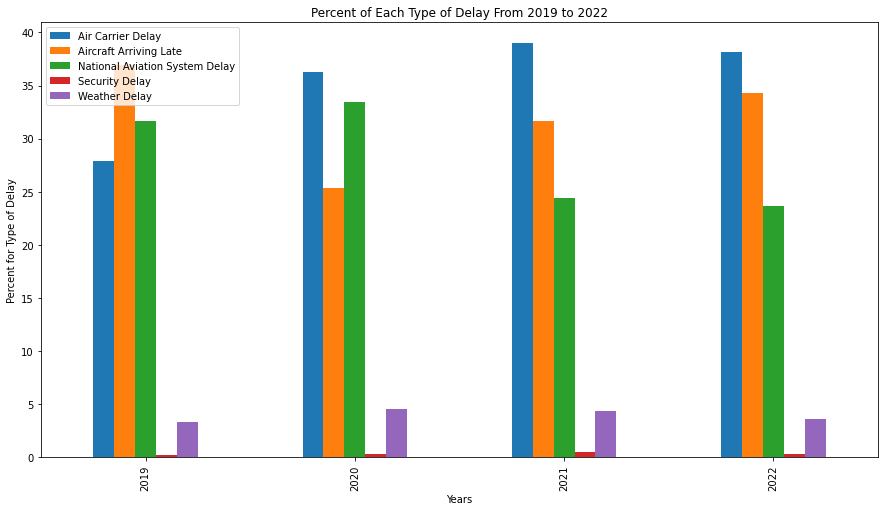

In [10]:
# Generate a bar plot showing the percent of each type of delay from 2019 to 2022
renamed_clean_delay_types_df_percentages_pivot = pd.pivot_table(renamed_clean_delay_types_df_percentages,
                                           index="year")
ax = renamed_clean_delay_types_df_percentages_pivot.plot(title = "Percent of Each Type of Delay From 2019 to 2022", kind = "bar")
fig = ax.get_figure()
fig.set_size_inches(15, 8)
ax.set_xlabel("Years")
ax.set_ylabel("Percent for Type of Delay")

# Conclusions
Firstly, after viewing the data and visualizations that we have generated, we can conclude that there was no correlation between the types of delays from 2019 to 2022.
- Percent of Air Carrier Delays: Increased, then decreased
- Percent of Aircrafts Arriving Late:  Decreased, then increased
- Percent of National Aviation System Delays: Increased, then decreased
- Percent of Security Delays: Increased, then decreased
- Percent of Weather Delays: Increased, then decreased.

The implications of these findings mean that as the years increase, the percentage of each type of delay did not decrease; the airlines were not able to figure out a way to lower the percent of delays occurring.

In [11]:
# Calculated summary statistics for the percent of each type of delay from 2019 to 2022
renamed_clean_delay_types_df_percentages.describe()

,Air Carrier Delay,Weather Delay,National Aviation System Delay,Security Delay,Aircraft Arriving Late
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,35.344079,3.957684,28.294559,0.331223,32.072562
std,5.075619,0.595995,4.948595,0.113918,4.953587
min,27.918126,3.332908,23.676731,0.190194,25.364205
25%,34.215896,3.511644,24.258021,0.281567,30.120795
50%,37.229666,3.974496,28.043408,0.334669,33.001114
75%,38.357849,4.420537,32.079946,0.384325,34.952881
max,38.998857,4.548836,33.414692,0.465362,36.923814


Text(0, 0.5, 'Percent for Type of Delay')

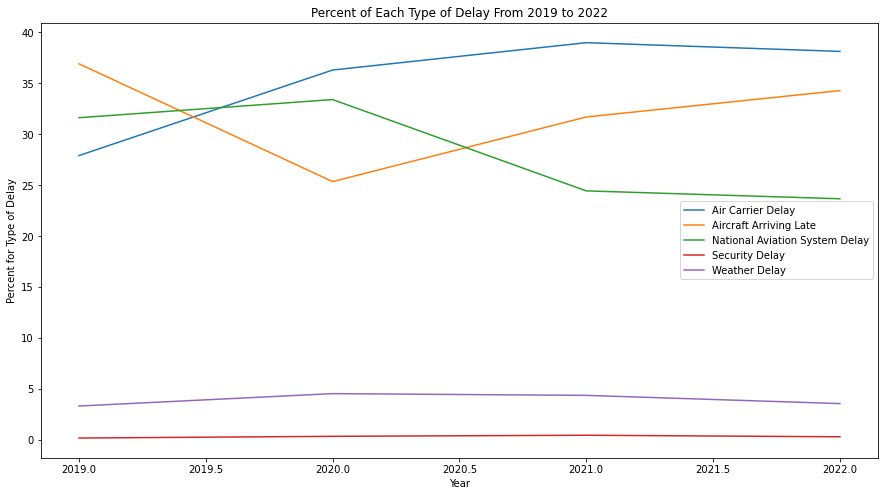

In [12]:
# Generate a line graph showing changes in percent of each type of delay from 2019 to 2022
percent_delays_line_pivot = pd.pivot_table(renamed_clean_delay_types_df_percentages,
                                           index="year")
ax = percent_delays_line_pivot.plot(title = "Percent of Each Type of Delay From 2019 to 2022", kind = "line")
fig = ax.get_figure()
fig.set_size_inches(15, 8)
ax.set_xlabel("Year")
ax.set_ylabel("Percent for Type of Delay")

# Conclusions:
- Secondly, after viewing the data and this visualization, we can conclude that as the years passed, the percent of Air Carrier Delays, Aircrafts Arriving Late, and National Aviation System Delays remained higher than the percent of Security Delays and Weather Delays.
- The implications of these findings mean that as the years passed, more passengers were affected by Air Carrier Delays, Aircrafts Arriving Late and National Aviation System Delays than Security Delays and Weather Delays. The airlines were not able to devise a way to lower the percent of flights delayed due to these three factors.

<function matplotlib.pyplot.show(close=None, block=None)>

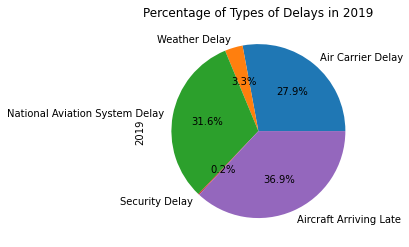

In [13]:
# plot pie chart for percentage of each type of delay by for 2019
delay_percentages_2019 = renamed_clean_delay_types_df_percentages.iloc[0]
delay_percentages_2019.plot.pie(title = "Percentage of Types of Delays in 2019", autopct= "%1.1f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

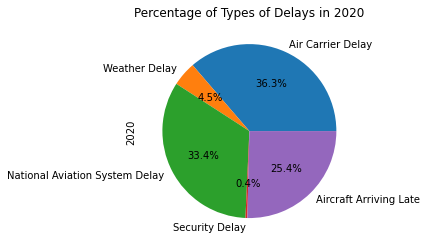

In [14]:
# plot pie chart for percentage of each type of delay by for 2020
delay_percentages_2020 = renamed_clean_delay_types_df_percentages.iloc[1]
delay_percentages_2020.plot.pie(title = "Percentage of Types of Delays in 2020", autopct= "%1.1f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

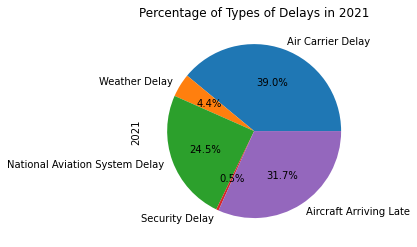

In [15]:
# plot pie chart for percentage of each type of delay by for 2021
delay_percentages_2021 = renamed_clean_delay_types_df_percentages.iloc[2]
delay_percentages_2021.plot.pie(title = "Percentage of Types of Delays in 2021", autopct= "%1.1f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

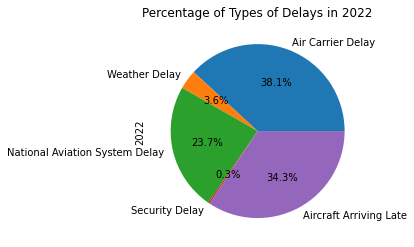

In [16]:
# plot pie chart for percentage of each type of delay by for 2022
delay_percentages_2022 = renamed_clean_delay_types_df_percentages.iloc[3]
delay_percentages_2022.plot.pie(title = "Percentage of Types of Delays in 2022", autopct= "%1.1f%%")
plt.show

# Conclusions
Thirdly, we can conclude that as the years passed:
- The total percentage of flights delayed due to Security Delays and Weather Delays did not change a lot.
- The total percentage of flights delayed due to Aircrafts Arriving late was lower in 2020 than in the other years.
- The total percentage of flights delayed due to Air Carrier Delays was lower in 2019 than in later years.
- The total percentage of flights delayed due to National Aviation System Delays was higher in 2019 and 2020 than in 2021 and 2022.

The implications of these findings mean that after 2020, passengers were less delayed due to National Aviation System Delays in flights. Airlines were able to devise a way to lower delays due to this cause. The implications of these findings also indicate that as the years passed, passengers were however more delayed due to Air Carrier Delays. Airlines were not able to come up with a way to lower delays due to this cause.